**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

## Tarefa #1: Recebendo os dados

In [ ]:
# Realizar o download do arquivo no nosso google Drive

data_google_id = '1WfDWYdflgm4uPD4szjyR97rxiqlrHE_l'
gdd(file_id= data_google_id,
    dest_path= './dados.csv',
    showsize= True,
    overwrite= True)
diabetes  = pd.read_csv("./dados.csv",
                        sep=",")
diabetes.head()

32.0 KiB Done.


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Tarefa #2: Analise Exploratória dos Dados

Vamos ver informações gerais dos nossos dados:

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Podemos observar uma diferença significativa na escala dos dados quando comparamos a coluna `pedi` com a coluna `insu`. Um modelo de Aprendizado de Máquina **pode** se tornar tendencioso se essa diferença de escala continuar nos dados. Por isso, iremos ver os conceitos da **Normalização e Padronização dos Dados**

Antes disso, vamos explorar um pouco os dados fazendo um histrograma de todas as colunas numéricas e a contagem dos valores da coluna `class` do nosso conjunto de dados:

<Axes: xlabel='mass', ylabel='Count'>

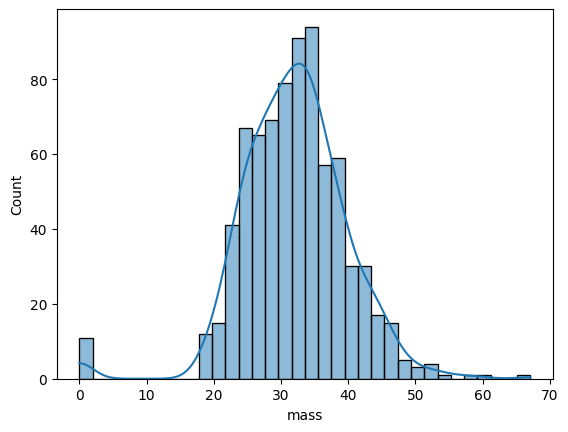

In [ ]:
sns.histplot(data=diabetes,
             x='mass',
             kde=True)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

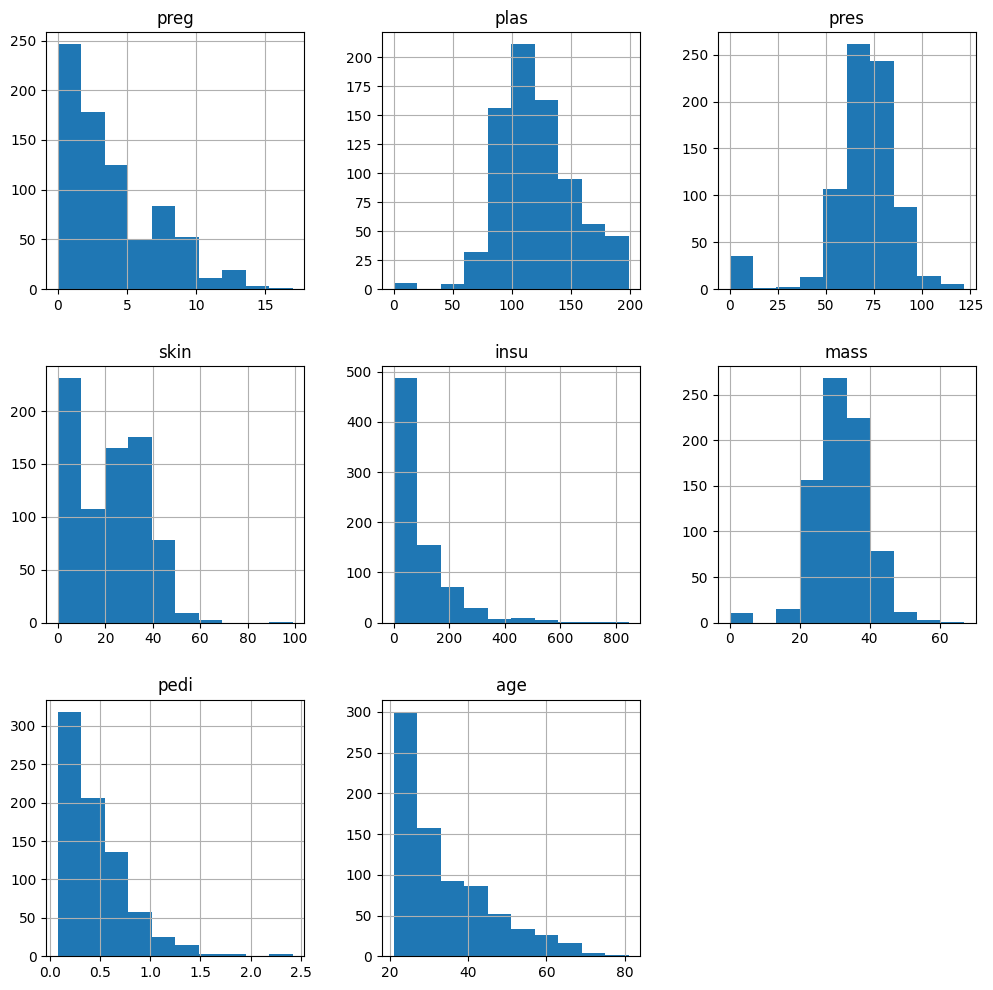

In [ ]:
diabetes.hist(figsize=(12,12))

<Axes: xlabel='class', ylabel='count'>

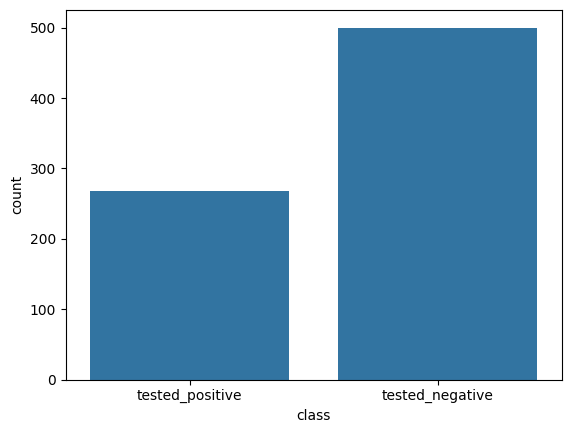

In [ ]:
sns.countplot(data=diabetes,
              x='class')

## Tarefa #3: Dividindo o conjunto de dados e Aplicando a Normalização OU Padronização

Vamos supor que desejamos criar um modelo para estimar se uma pessoa possui ou não diabetes

In [ ]:
# Dividindo o conjunto de dados
X = diabetes.drop(columns=['class'])
y = diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,preg,plas,pres,skin,insu,mass,pedi,age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


Vamos aplicar a normalização e a padronização dos dados nas duas células a seguir:

In [ ]:
#Instanciando um objeto de Normalização:
scaler= MinMaxScaler()
#Metodo Fit
scaler.fit(X_train)
#Mudando a Escala dos dados
X_train_norm= scaler.transform(X_train)
X_test_norm= scaler.transform(X_test)

In [ ]:
#Instanciando um objeto de Padronização:
scaler= StandardScaler()
#Metodo Fit - desvio padrão e média
scaler.fit(X_train)
#Mudando a Escala dos dados
X_train_pad= scaler.transform(X_train)
X_test_pad= scaler.transform(X_test)

Vale a pena destacar que quando usamos o `MinMaxScaler().fit()` ou o `StandardScaler().fit(X_train)` para que fossem encontrados os mínimos e os máximos de cada uma das colunas ou a média e o desvio padrão de cada coluna respectivamente, passamos apenas a informação dos dados do conjunto de treinamento (`X_train`). As informações contidas no conjunto de teste (`X_test`) nunca devem influenciar o pré-processamento dos dados, pois estariamos obtendo informações de um conjunto de dados que não participa do treinamento.

Vamos agora verificar o que ocorreu com os dados quando aplicamos a normalização e a padronização. Para isso, iremos transformar os nossos dados em um DataFrame, apenas para facilitar a visualização dos dados:

In [ ]:
df_norm= pd.DataFrame(data=X_train_norm,
                      columns=X_train.columns)
df_norm.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.058824,0.477387,0.491803,0.285714,0.068558,0.356185,0.077711,0.016667
1,0.294118,0.527638,0.590164,0.460317,0.384161,0.549925,0.034586,0.116667
2,0.000000,0.678392,0.557377,0.666667,0.295508,0.630402,0.122545,0.050000
3,0.235294,0.658291,0.557377,0.333333,0.196217,0.493294,0.035013,0.116667
4,0.058824,0.517588,0.245902,0.603175,0.098109,0.645306,0.044833,0.200000


In [ ]:
df_pad= pd.DataFrame(data=X_train_pad,
                      columns=X_train.columns)
df_pad.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
1,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
2,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
3,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
4,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


### Dados normalizados e Padronizados:

Text(0.5, 1.0, 'Dados Padronizados')

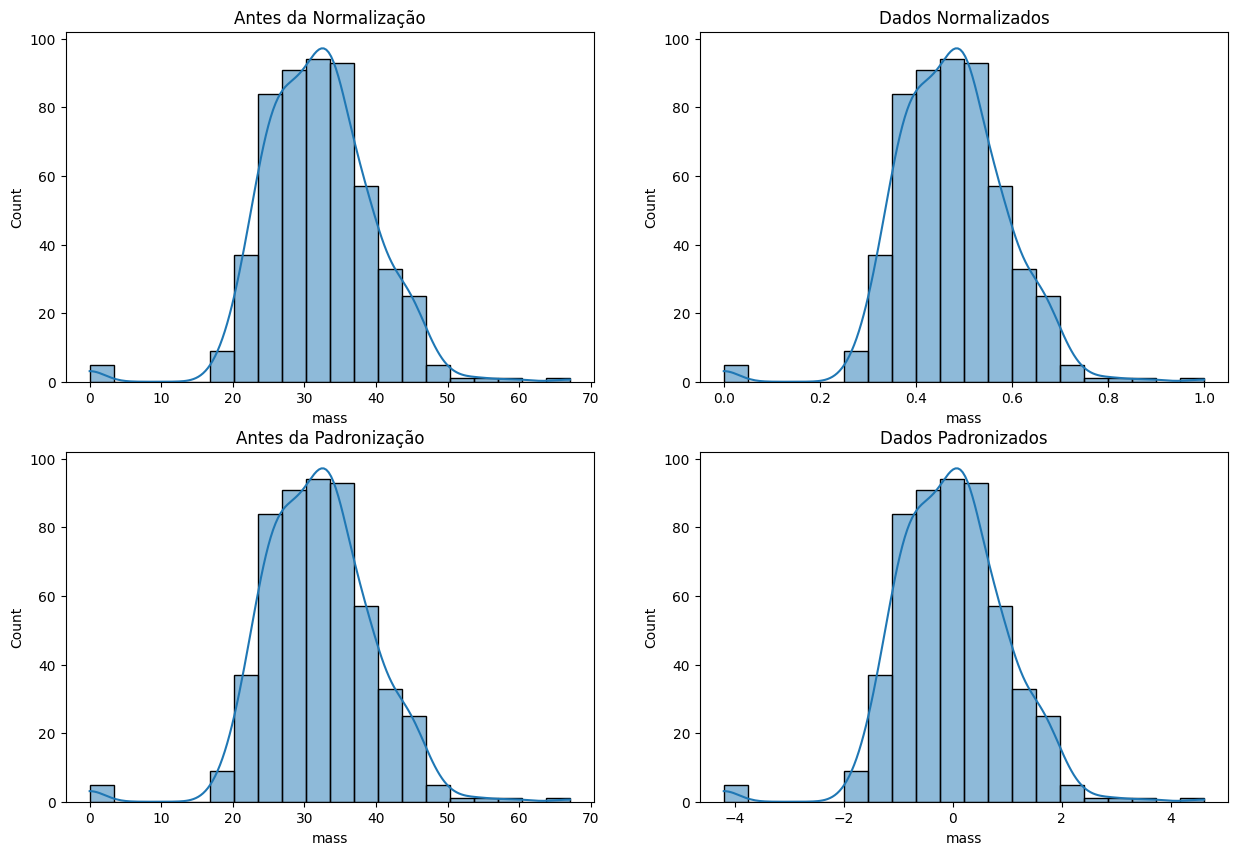

In [ ]:
#Criando o grafico para comunicação
fig, eixos = plt.subplots(ncols=2,
                           nrows=2,
                           figsize=(15,10))
sns.histplot(data=X_train, x='mass', bins=20, kde=True, ax=eixos[0,0])
sns.histplot(data=df_norm, x='mass', bins=20, kde=True, ax=eixos[0,1])
sns.histplot(data=X_train, x='mass', bins=20, kde=True, ax=eixos[1,0])
sns.histplot(data=df_pad, x='mass', bins=20, kde=True, ax=eixos[1,1])
eixos[0,0].set_title('Antes da Normalização')
eixos[0,1].set_title('Dados Normalizados')
eixos[1,0].set_title('Antes da Padronização')
eixos[1,1].set_title('Dados Padronizados')


Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da normalização dos dados. Podemos observar apenas que os valores estão agora num intervalo de 0 até 1.

Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da padronização dos dados. Podemos observar apenas que a média dos dados está centralizada em 0 e existem valores negativos nos nossos dados.

# Exercício)

Para o conjunto de dados Admission_Predict.csv aplique a normalização no conjunto de dados e faça um histograma para comparar os dados antes e após a normalização.

In [ ]:
adimissao = pd.read_csv("./Admission_Predict.csv",
                        sep=",")
adimissao.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
adimissao.describe()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
adimissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_num.        400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance             400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
adimissao.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = adimissao.drop(columns=['Chance'])
y = adimissao['Chance']
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
157,158,309,104,2,2.0,2.5,8.26,0
109,110,304,103,5,5.0,4.0,8.64,0
17,18,319,106,3,4.0,3.0,8.00,1
347,348,299,94,1,1.0,1.0,7.34,0
24,25,336,119,5,4.0,3.5,9.80,1


In [ ]:
#Instanciando um objeto de Normalização:
scaler= MinMaxScaler()
#Metodo Fit
scaler.fit(X_train)
#Mudando a Escala dos dados
X_train_norm= scaler.transform(X_train)
X_test_norm= scaler.transform(X_test)

In [ ]:
#Instanciando um objeto de Padronização:
scaler= StandardScaler()
#Metodo Fit - desvio padrão e média
scaler.fit(X_train)
#Mudando a Escala dos dados
X_train_pad= scaler.transform(X_train)
X_test_pad= scaler.transform(X_test)

In [ ]:
df_norm= pd.DataFrame(data=X_train_norm,
                      columns=X_train.columns)
df_norm.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.391960,0.38,0.428571,0.25,0.25,0.375,0.467949,0.0
1,0.271357,0.28,0.392857,1.00,1.00,0.750,0.589744,0.0
2,0.040201,0.58,0.500000,0.50,0.75,0.500,0.384615,1.0
3,0.869347,0.18,0.071429,0.00,0.00,0.000,0.173077,0.0
4,0.057789,0.92,0.964286,1.00,0.75,0.625,0.961538,1.0


In [ ]:
df_pad= pd.DataFrame(data=X_train_pad,
                      columns=X_train.columns)
df_pad.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.410854,-0.720354,-0.603704,-0.966795,-1.374199,-1.038706,-0.578281,-1.129789
1,-0.840238,-1.161131,-0.770079,1.644484,1.555566,0.598279,0.062180,-1.129789
2,-1.663225,0.161198,-0.270954,-0.096369,0.578977,-0.493044,-1.016490,0.885121
3,1.288791,-1.601907,-2.267454,-1.837221,-2.350788,-2.675691,-2.128869,-1.129789
4,-1.600606,1.659838,1.891922,1.644484,0.578977,0.052617,2.017270,0.885121


Text(0.5, 1.0, 'Dados Padronizados')

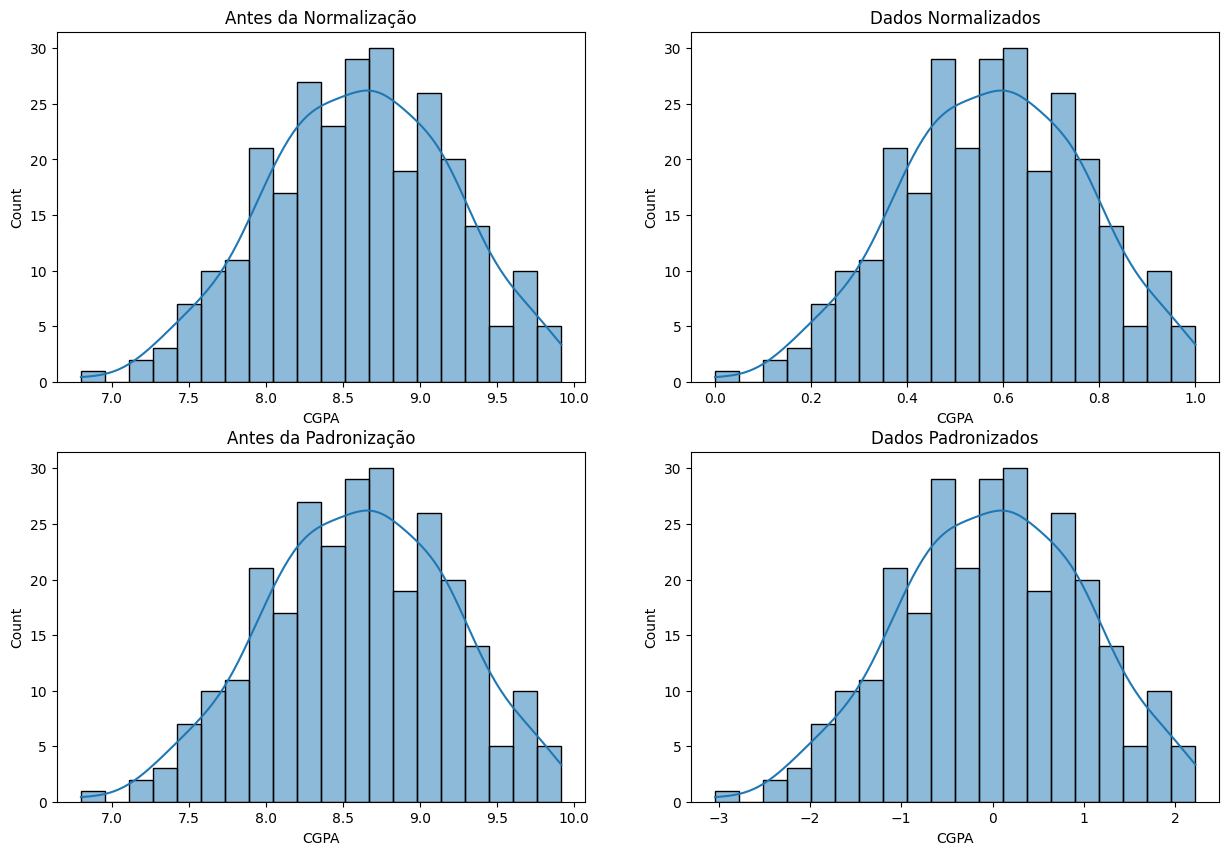

In [ ]:
#Criando o grafico para comunicação
fig, eixos = plt.subplots(ncols=2,
                           nrows=2,
                           figsize=(15,10))
sns.histplot(data=X_train, x='CGPA', bins=20, kde=True, ax=eixos[0,0])
sns.histplot(data=df_norm, x='CGPA', bins=20, kde=True, ax=eixos[0,1])
sns.histplot(data=X_train, x='CGPA', bins=20, kde=True, ax=eixos[1,0])
sns.histplot(data=df_pad, x='CGPA', bins=20, kde=True, ax=eixos[1,1])
eixos[0,0].set_title('Antes da Normalização')
eixos[0,1].set_title('Dados Normalizados')
eixos[1,0].set_title('Antes da Padronização')
eixos[1,1].set_title('Dados Padronizados')